In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt


In [ ]:
import seaborn as sns

In [ ]:
data = pd.read_csv('GOTO.JK.csv')

In [ ]:
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2022-12-05,123.0,123.0,123.0,123.0,123.0,172815100
1,2022-12-06,115.0,115.0,115.0,115.0,115.0,188696800
2,2022-12-07,107.0,107.0,107.0,107.0,107.0,248475200
3,2022-12-08,100.0,100.0,100.0,100.0,100.0,482718800
4,2022-12-09,93.0,93.0,93.0,93.0,93.0,280769900


In [ ]:
# Menampilkan statistik deskriptif
data.describe()


,Open,High,Low,Close,Adj Close,Volume
count,280.000000,280.000000,280.000000,280.000000,280.000000,2.800000e+02
mean,99.400000,101.964286,96.760714,99.317857,99.317857,4.228041e+09
std,16.429408,16.636924,16.361175,16.634023,16.634023,6.142076e+09
min,56.000000,58.000000,54.000000,56.000000,56.000000,0.000000e+00
25%,88.000000,90.000000,86.000000,87.000000,87.000000,1.697469e+09
50%,95.000000,99.000000,93.000000,96.000000,96.000000,2.909229e+09
75%,114.000000,116.000000,111.000000,114.000000,114.000000,4.401959e+09
max,131.000000,147.000000,128.000000,147.000000,147.000000,6.601081e+10


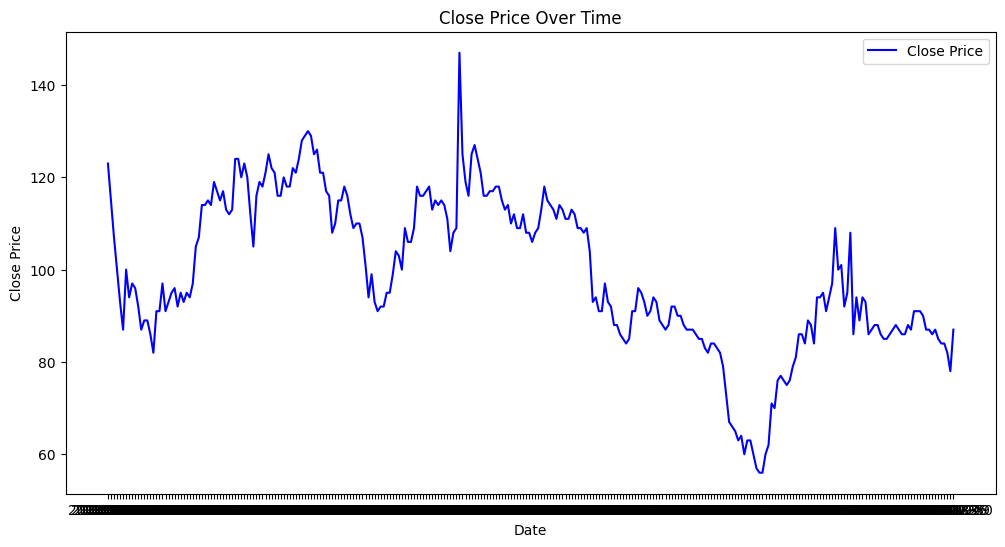

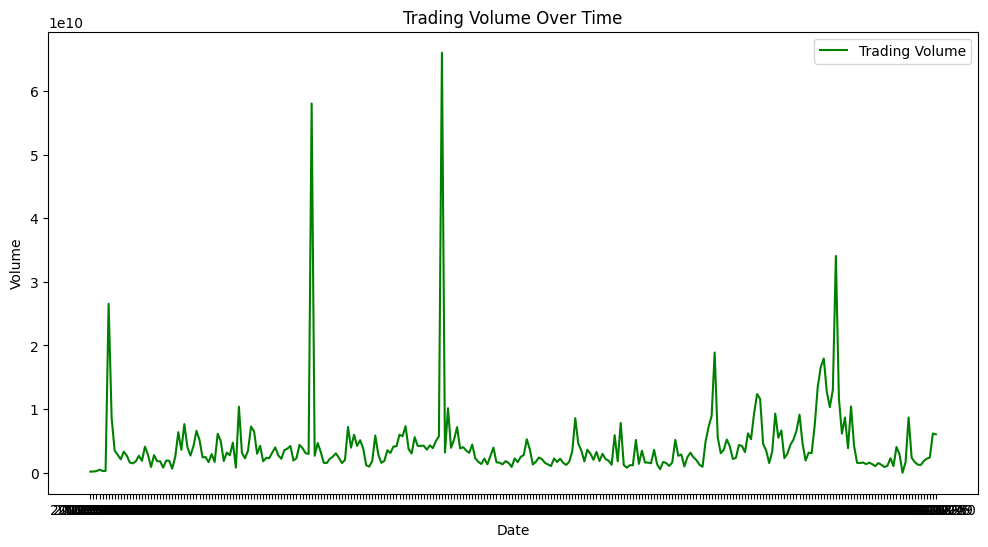

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(data['Date'], data['Close'], label='Close Price', color='blue')
plt.title('Close Price Over Time')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()

# Plot Volume perdagangan seiring waktu
plt.figure(figsize=(12, 6))
plt.plot(data['Date'], data['Volume'], label='Trading Volume', color='green')
plt.title('Trading Volume Over Time')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.legend()
plt.show()

<ipython-input-23-304e303cda74>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data.corr()


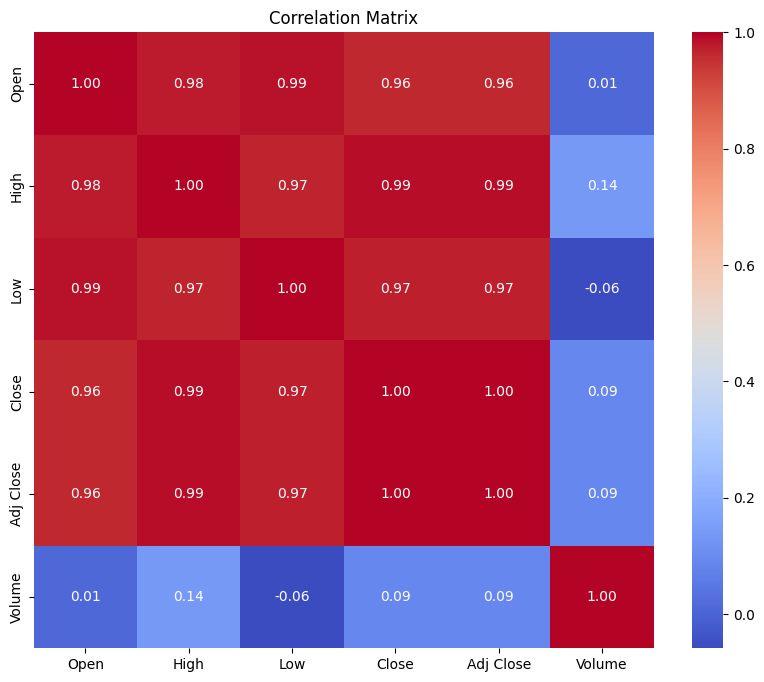

In [ ]:
# Matriks Korelasi
correlation_matrix = data.corr()

# Plot Matriks Korelasi
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Memilih fitur dan target
features = data[['Open', 'High', 'Low', 'Volume']]
target = data['Close']

# Membagi data menjadi data pelatihan dan data validasi
X_train, X_valid, y_train, y_valid = train_test_split(features, target, test_size=0.2, random_state=42)

# Membuat model regresi linear
model = LinearRegression()

# Melatih model
model.fit(X_train, y_train)

# Membuat prediksi
predictions = model.predict(X_valid)

# Evaluasi kinerja model
mse = mean_squared_error(y_valid, predictions)
print(f'Mean Squared Error: {mse}')


Mean Squared Error: 4.843306242150993


In [ ]:
# Memilih fitur untuk prediksi di masa depan (gunakan data terkini)
future_data = data[['Open', 'High', 'Low', 'Volume']].tail(5)  # Ganti 5 dengan jumlah baris yang diinginkan
future_predictions = model.predict(future_data)

# Menampilkan hasil prediksi di masa depan
print("Future Predictions:")
print(future_predictions)


Future Predictions:
[83.86592908 84.66910514 81.98150835 77.6885253  86.38893101]


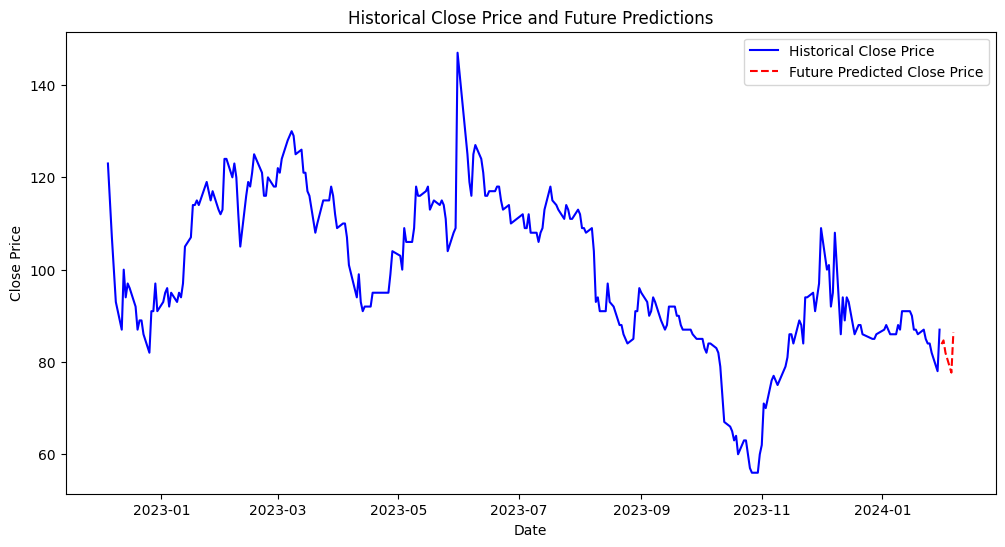

In [ ]:
import matplotlib.pyplot as plt

# Memasukkan hasil prediksi ke dalam dataframe
future_dates = pd.date_range(start=data['Date'].iloc[-1], periods=len(future_predictions)+1, freq='B')[1:]
future_predictions_df = pd.DataFrame({'Date': future_dates, 'Predicted Close Price': future_predictions})
future_predictions_df.set_index('Date', inplace=True)

# Visualisasi hasil prediksi vs harga penutup aktual
plt.figure(figsize=(12, 6))
plt.plot(data['Date'], data['Close'], label='Historical Close Price', color='blue')
plt.plot(future_predictions_df.index, future_predictions_df['Predicted Close Price'], label='Future Predicted Close Price', color='red', linestyle='dashed')
plt.title('Historical Close Price and Future Predictions')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()
